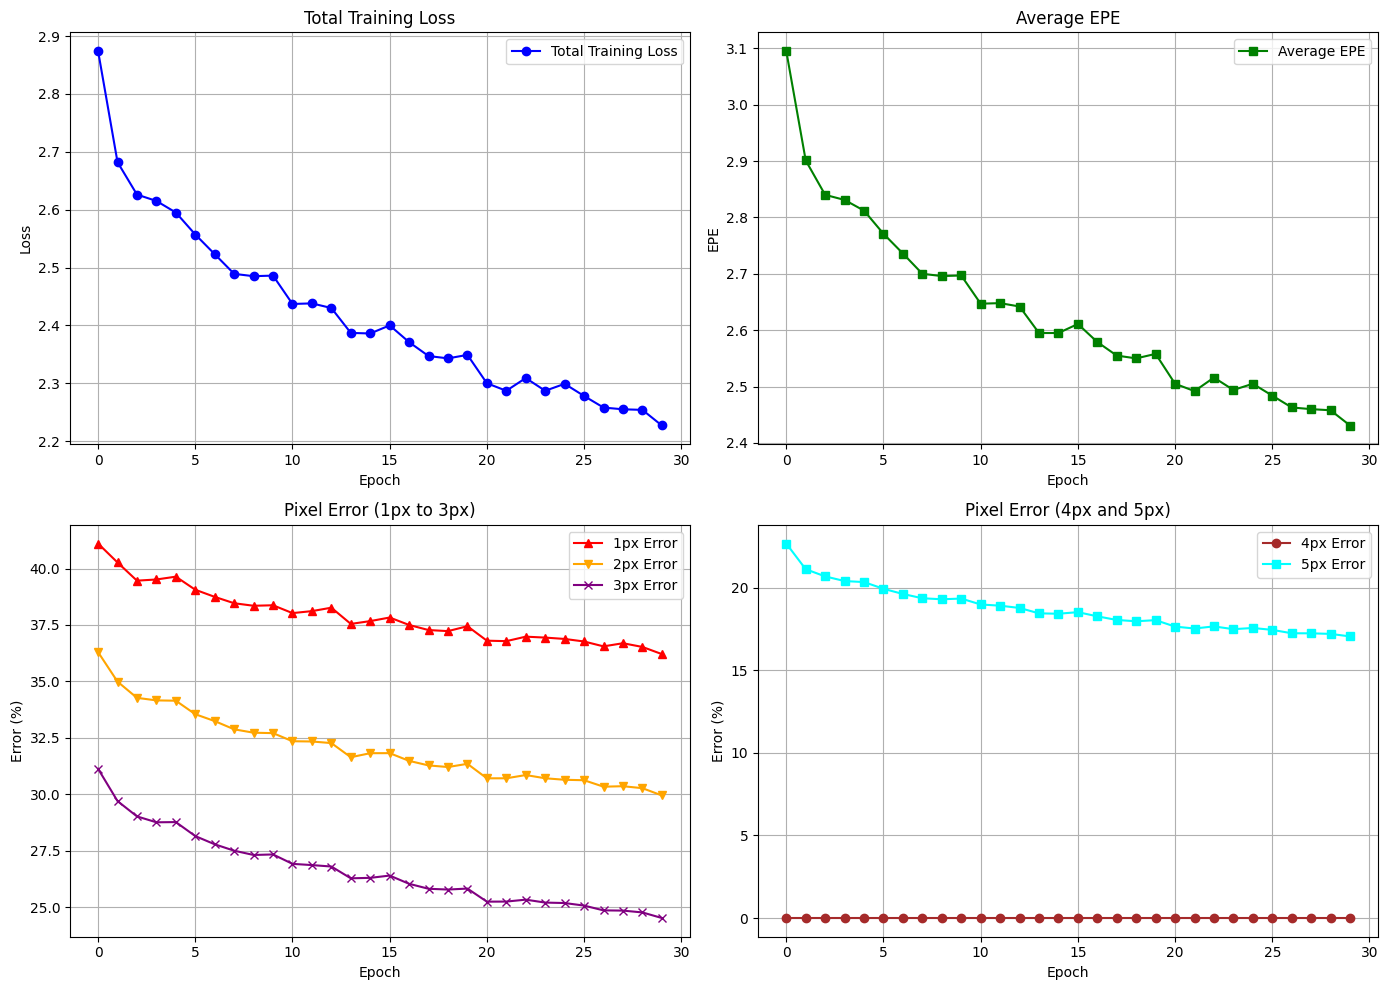

In [6]:
import re
import matplotlib.pyplot as plt

# Initialiser les listes
epochs = []
total_losses = []
EPEs = []
error_1px = []
error_2px = []
error_3px = []
error_4px = []
error_5px = []

with open("/home/cerbere-25/TemporalEventStereo_Official/checkpoints_transformer/log.txt", "r") as f:
    current_epoch = None
    current_data = {}

    for line in f:
        match_epoch = re.search(r'This is (\d+)-th epoch', line)
        if match_epoch:
            # Sauvegarder les données précédentes si elles sont complètes
            if current_epoch is not None and 'loss' in current_data:
                epochs.append(current_epoch)
                total_losses.append(current_data.get('loss', 0.0))
                EPEs.append(current_data.get('epe', 0.0))
                error_1px.append(current_data.get('1px', 0.0))
                error_2px.append(current_data.get('2px', 0.0))
                error_3px.append(current_data.get('3px', 0.0))
                error_4px.append(current_data.get('4px', 0.0))
                error_5px.append(current_data.get('5px', 0.0))

            # Nouvelle époque
            current_epoch = int(match_epoch.group(1))
            current_data = {}
            continue

        if 'total training loss' in line:
            m = re.search(r'total training loss = ([\d.]+)', line)
            if m:
                current_data['loss'] = float(m.group(1))

        elif 'average EPE' in line:
            m = re.search(r'average EPE = ([\d.]+)', line)
            if m:
                current_data['epe'] = float(m.group(1))

        elif 'average 1px error' in line:
            m = re.search(r'average 1px error = ([\d.]+)%', line)
            if m:
                current_data['1px'] = float(m.group(1))

        elif 'average 2px error' in line:
            m = re.search(r'average 2px error = ([\d.]+)%', line)
            if m:
                current_data['2px'] = float(m.group(1))

        elif 'average 3px error' in line:
            m = re.search(r'average 3px error = ([\d.]+)%', line)
            if m:
                current_data['3px'] = float(m.group(1))

        elif 'average 4px error' in line:
            m = re.search(r'average 4px error = ([\d.]+)%', line)
            if m:
                current_data['4px'] = float(m.group(1))

        elif 'average 5px error' in line:
            m = re.search(r'average 5px error = ([\d.]+)%', line)
            if m:
                current_data['5px'] = float(m.group(1))

# N'oublie pas de sauver la dernière époque
if current_epoch is not None and 'loss' in current_data:
    epochs.append(current_epoch)
    total_losses.append(current_data.get('loss', 0.0))
    EPEs.append(current_data.get('epe', 0.0))
    error_1px.append(current_data.get('1px', 0.0))
    error_2px.append(current_data.get('2px', 0.0))
    error_3px.append(current_data.get('3px', 0.0))
    error_4px.append(current_data.get('4px', 0.0))
    error_5px.append(current_data.get('5px', 0.0))

plt.figure(figsize=(14, 10))

# Total training loss
plt.subplot(2, 2, 1)
plt.plot(epochs, total_losses, marker='o', label='Total Training Loss', color='blue')
plt.title('Total Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Average EPE
plt.subplot(2, 2, 2)
plt.plot(epochs, EPEs, marker='s', label='Average EPE', color='green')
plt.title('Average EPE')
plt.xlabel('Epoch')
plt.ylabel('EPE')
plt.grid(True)
plt.legend()

# 1px, 2px, 3px errors
plt.subplot(2, 2, 3)
plt.plot(epochs, error_1px, marker='^', label='1px Error', color='red')
plt.plot(epochs, error_2px, marker='v', label='2px Error', color='orange')
plt.plot(epochs, error_3px, marker='x', label='3px Error', color='purple')
plt.title('Pixel Error (1px to 3px)')
plt.xlabel('Epoch')
plt.ylabel('Error (%)')
plt.grid(True)
plt.legend()

# 4px and 5px errors
plt.subplot(2, 2, 4)
plt.plot(epochs, error_4px, marker='o', label='4px Error', color='brown')
plt.plot(epochs, error_5px, marker='s', label='5px Error', color='cyan')
plt.title('Pixel Error (4px and 5px)')
plt.xlabel('Epoch')
plt.ylabel('Error (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
